In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

In [2]:
data_dir = '../data/raw/'

df = pd.read_csv(data_dir + "WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col="customerID")

print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns\n")
print(f"{df.dtypes}\n")
df

Dataset shape: 7043 rows, 20 columns

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [3]:
print("Checking for missing values ...")
print(df.columns[df.isnull().any()].to_list())

Checking for missing values ...
[]


In [4]:
print(f"Number of duplicated rows : {df.duplicated().sum()}")

Number of duplicated rows : 22


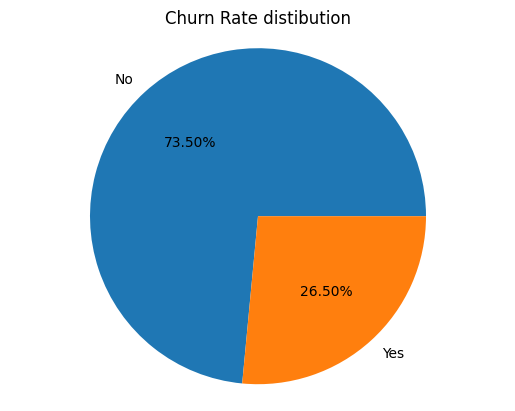

In [5]:
percents = ((df["Churn"].value_counts() / df["Churn"].value_counts().sum()) * 100).round(1).to_dict()

plt.pie(x=percents.values(), labels=percents.keys(), autopct="%1.2f%%")
plt.axis("equal")
plt.title("Churn Rate distibution")
plt.show()

The Churn column:
- Yes : the customer has left the service
- No  : the client stayed

## Analyse of categorical variables

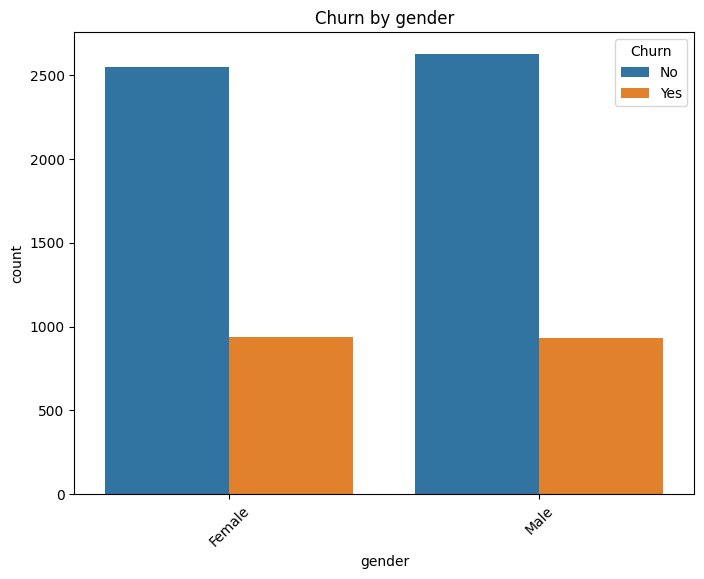

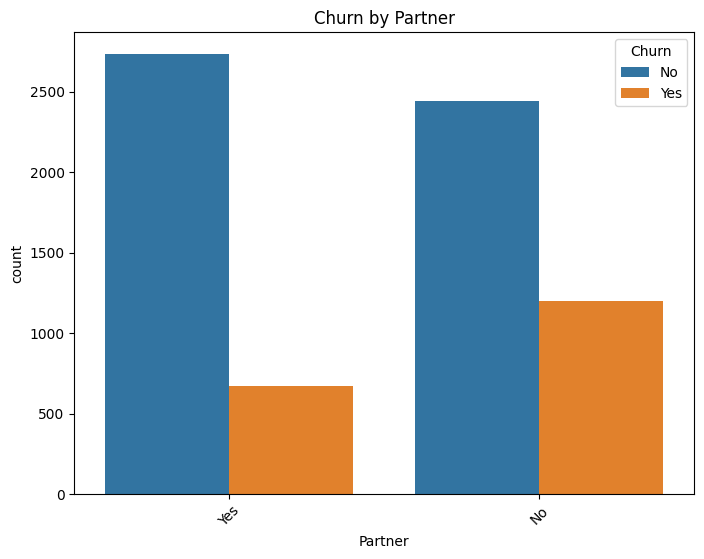

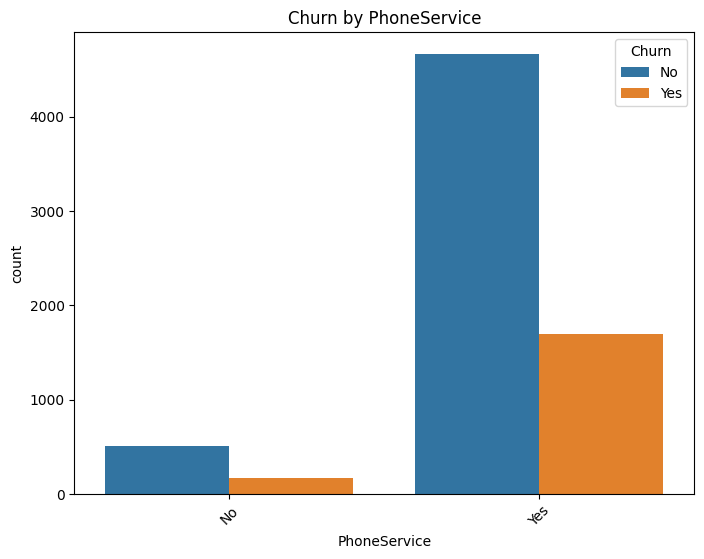

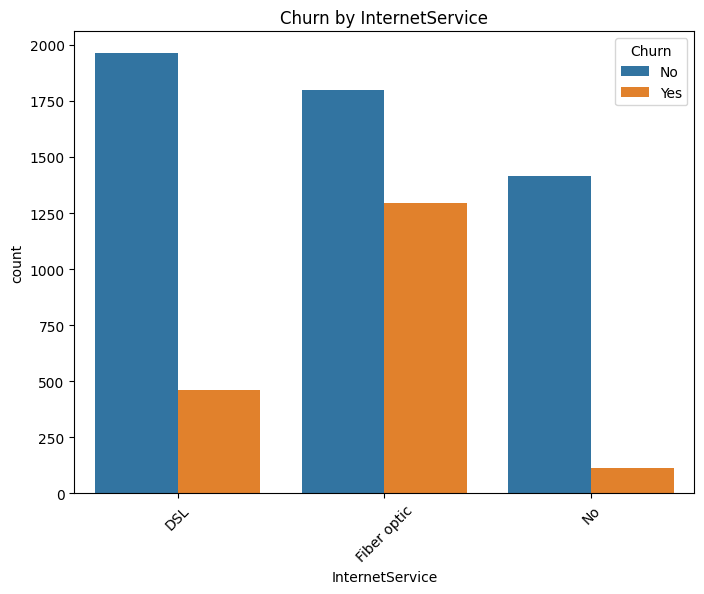

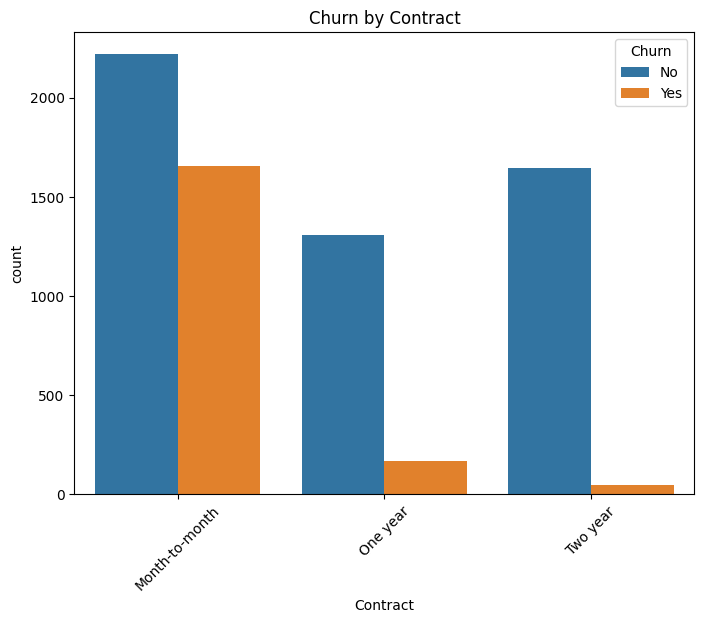

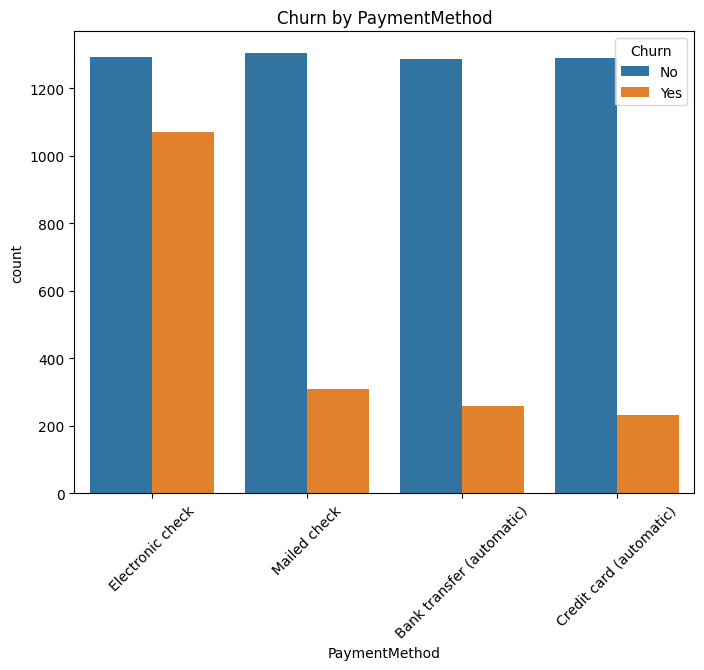

In [6]:
catego_cols = ["gender", "Partner", "PhoneService", "InternetService", "Contract", "PaymentMethod"]
for col in catego_cols :
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45, ha="center")
    

## Analyse of numerical variables

tenure : Number of months the customer has stayed with the company

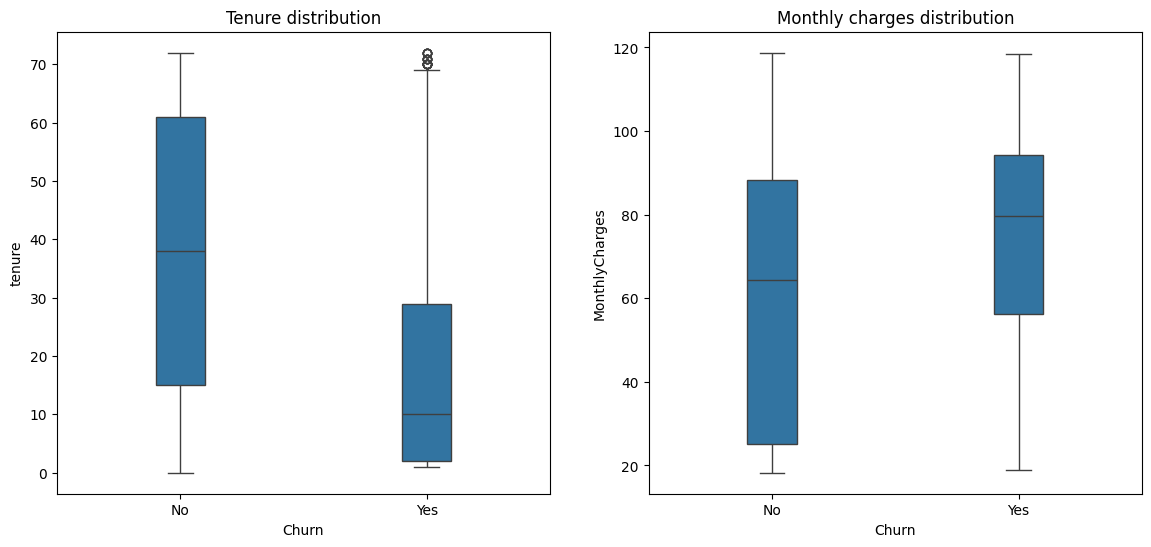

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flat
sns.boxplot(data=df, x="Churn", y="tenure", ax=axes[0], width=0.2)
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", ax=axes[1], width=0.2)
axes[0].set_title(f"Tenure distribution")
axes[1].set_title(f"Monthly charges distribution")
plt.show()

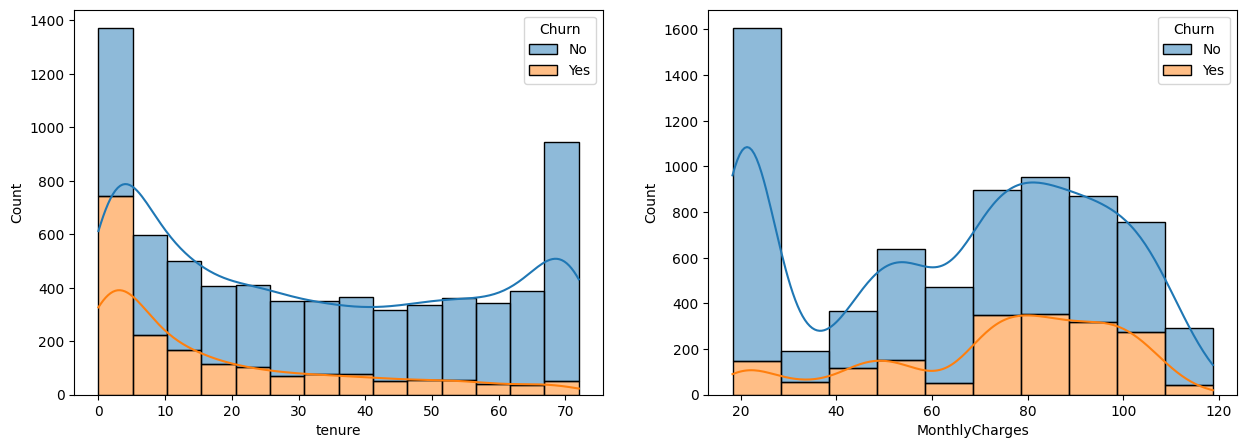

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes = axes.flat

sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", kde=True, binwidth=5, ax=axes[0])
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack", kde=True, binwidth=10, ax=axes[1])

plt.show()

In [9]:
df["TotalCharges"].replace(" ", np.nan, inplace=True)  # Replace empty strings with NaN
df["TotalCharges"] = df["TotalCharges"].astype(float)  # Convert to float
print(f"{df['TotalCharges'].isnull().sum()} missing values")

11 missing values


/tmp/ipykernel_163186/2323603910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].replace(" ", np.nan, inplace=True)  # Replace empty strings with NaN


Text(0.5, 1.0, 'Total charges distribution')

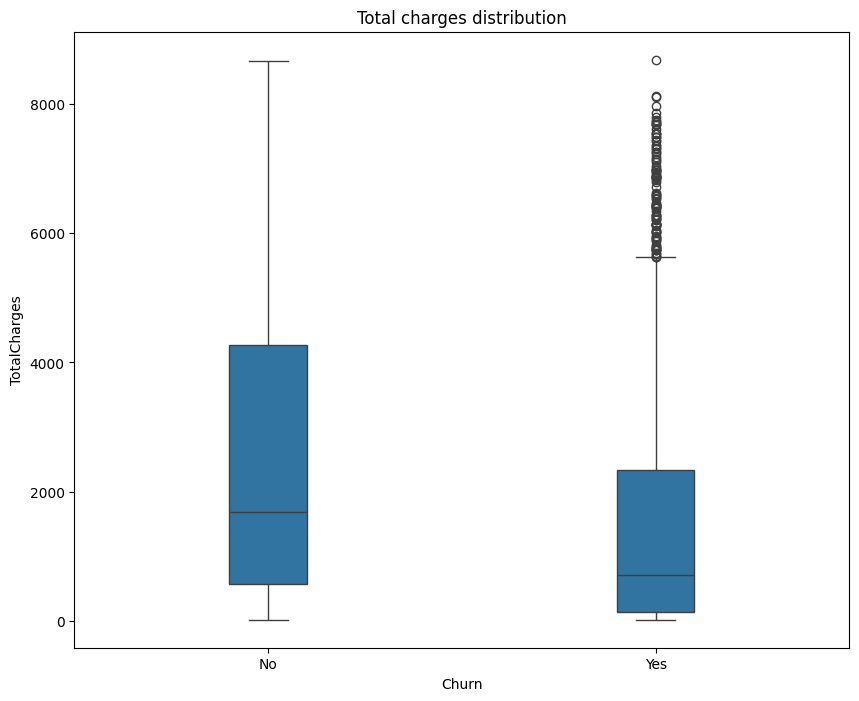

In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="Churn", y="TotalCharges", width=0.2)
plt.title(f"Total charges distribution")

<Axes: xlabel='TotalCharges', ylabel='Density'>

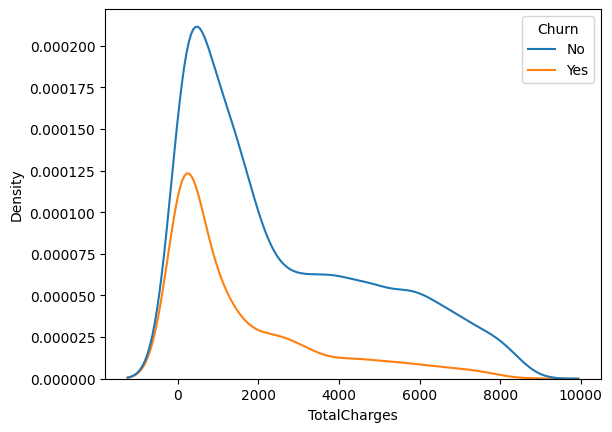

In [11]:
sns.kdeplot(df, x="TotalCharges", hue="Churn")

In [12]:
(pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100).round(2)

Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


## Correlation Analysis

In [13]:
corr_matrix = df.corr(numeric_only=True).round(2)
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.00,0.02,0.22,0.10
tenure,0.02,1.00,0.25,0.83
MonthlyCharges,0.22,0.25,1.00,0.65
TotalCharges,0.10,0.83,0.65,1.00


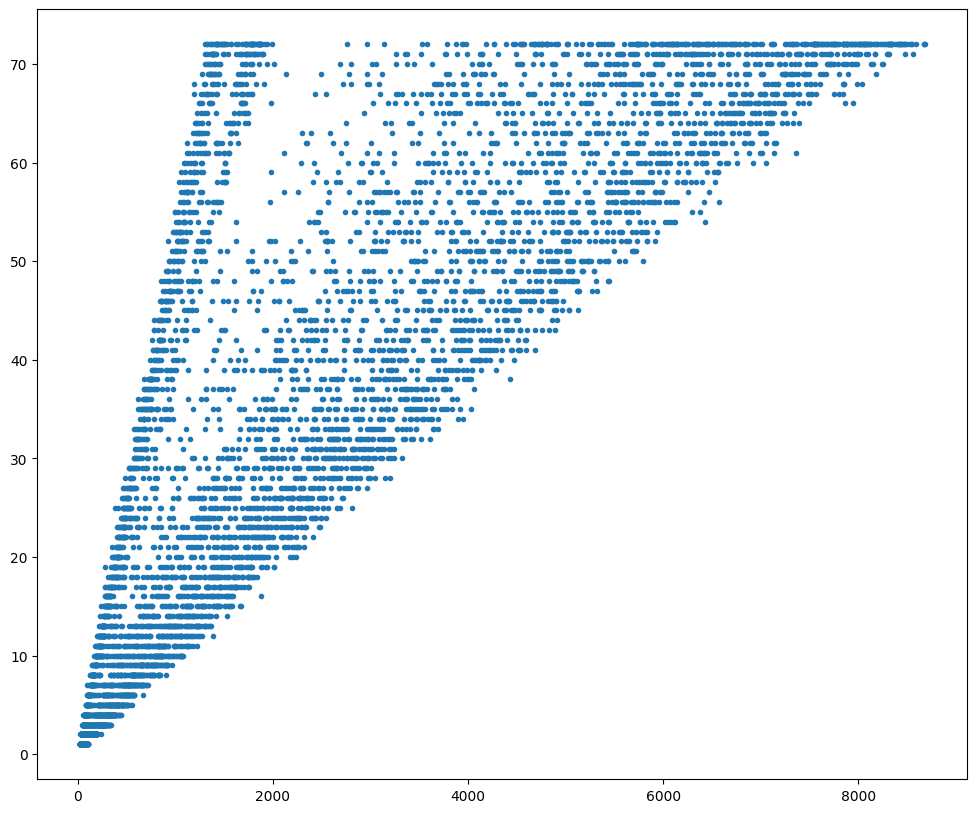

In [14]:
plt.figure(figsize=(12, 10))
plt.scatter(x=df["TotalCharges"], y=df["tenure"], marker=".")